In [1]:
!nvidia-smi

Thu May 25 14:13:09 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.41                 Driver Version: 531.41       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070 T...  WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P5               22W /  N/A|    543MiB /  8192MiB |     12%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\rafak\Documents\GitHub\Questoes-Trabalhos-Inteli-M6\ponderada3


In [3]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.107  Python-3.11.2 torch-2.0.1+cpu CPU
Setup complete  (20 CPUs, 15.7 GB RAM, 322.8/930.7 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

!pip install roboflow


rf = Roboflow(api_key="mK5BYNmGDsKe7FgLasoO")
project = rf.workspace("university-bswxt").project("crack-bphdr")
dataset = project.version(2).download("yolov8")


[WinError 2] O sistema não pode encontrar o arquivo especificado: 'c:\\Users\\rafak\\Documents\\GitHub\\Questoes-Trabalhos-Inteli-M6\\ponderada3/datasets'
c:\Users\rafak\Documents\GitHub\Questoes-Trabalhos-Inteli-M6\ponderada3


A sintaxe do comando est� incorreta.


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.107, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to crack-2 in yolov8:: 100%|██████████| 8070/8070 [00:12<00:00, 645.09it/s]


In [6]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

c:\Users\rafak\Documents\GitHub\Questoes-Trabalhos-Inteli-M6\ponderada3
^C


In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    results.png
BoxF1_curve.png					    train_batch0.jpg
BoxP_curve.png					    train_batch1.jpg
BoxPR_curve.png					    train_batch2.jpg
BoxR_curve.png					    val_batch0_labels.jpg
confusion_matrix.png				    val_batch0_pred.jpg
events.out.tfevents.1685031773.8faa5767749f.2334.0  val_batch1_labels.jpg
MaskF1_curve.png				    val_batch1_pred.jpg
MaskP_curve.png					    val_batch2_labels.jpg
MaskPR_curve.png				    val_batch2_pred.jpg
MaskR_curve.png					    weights
results.csv


/content


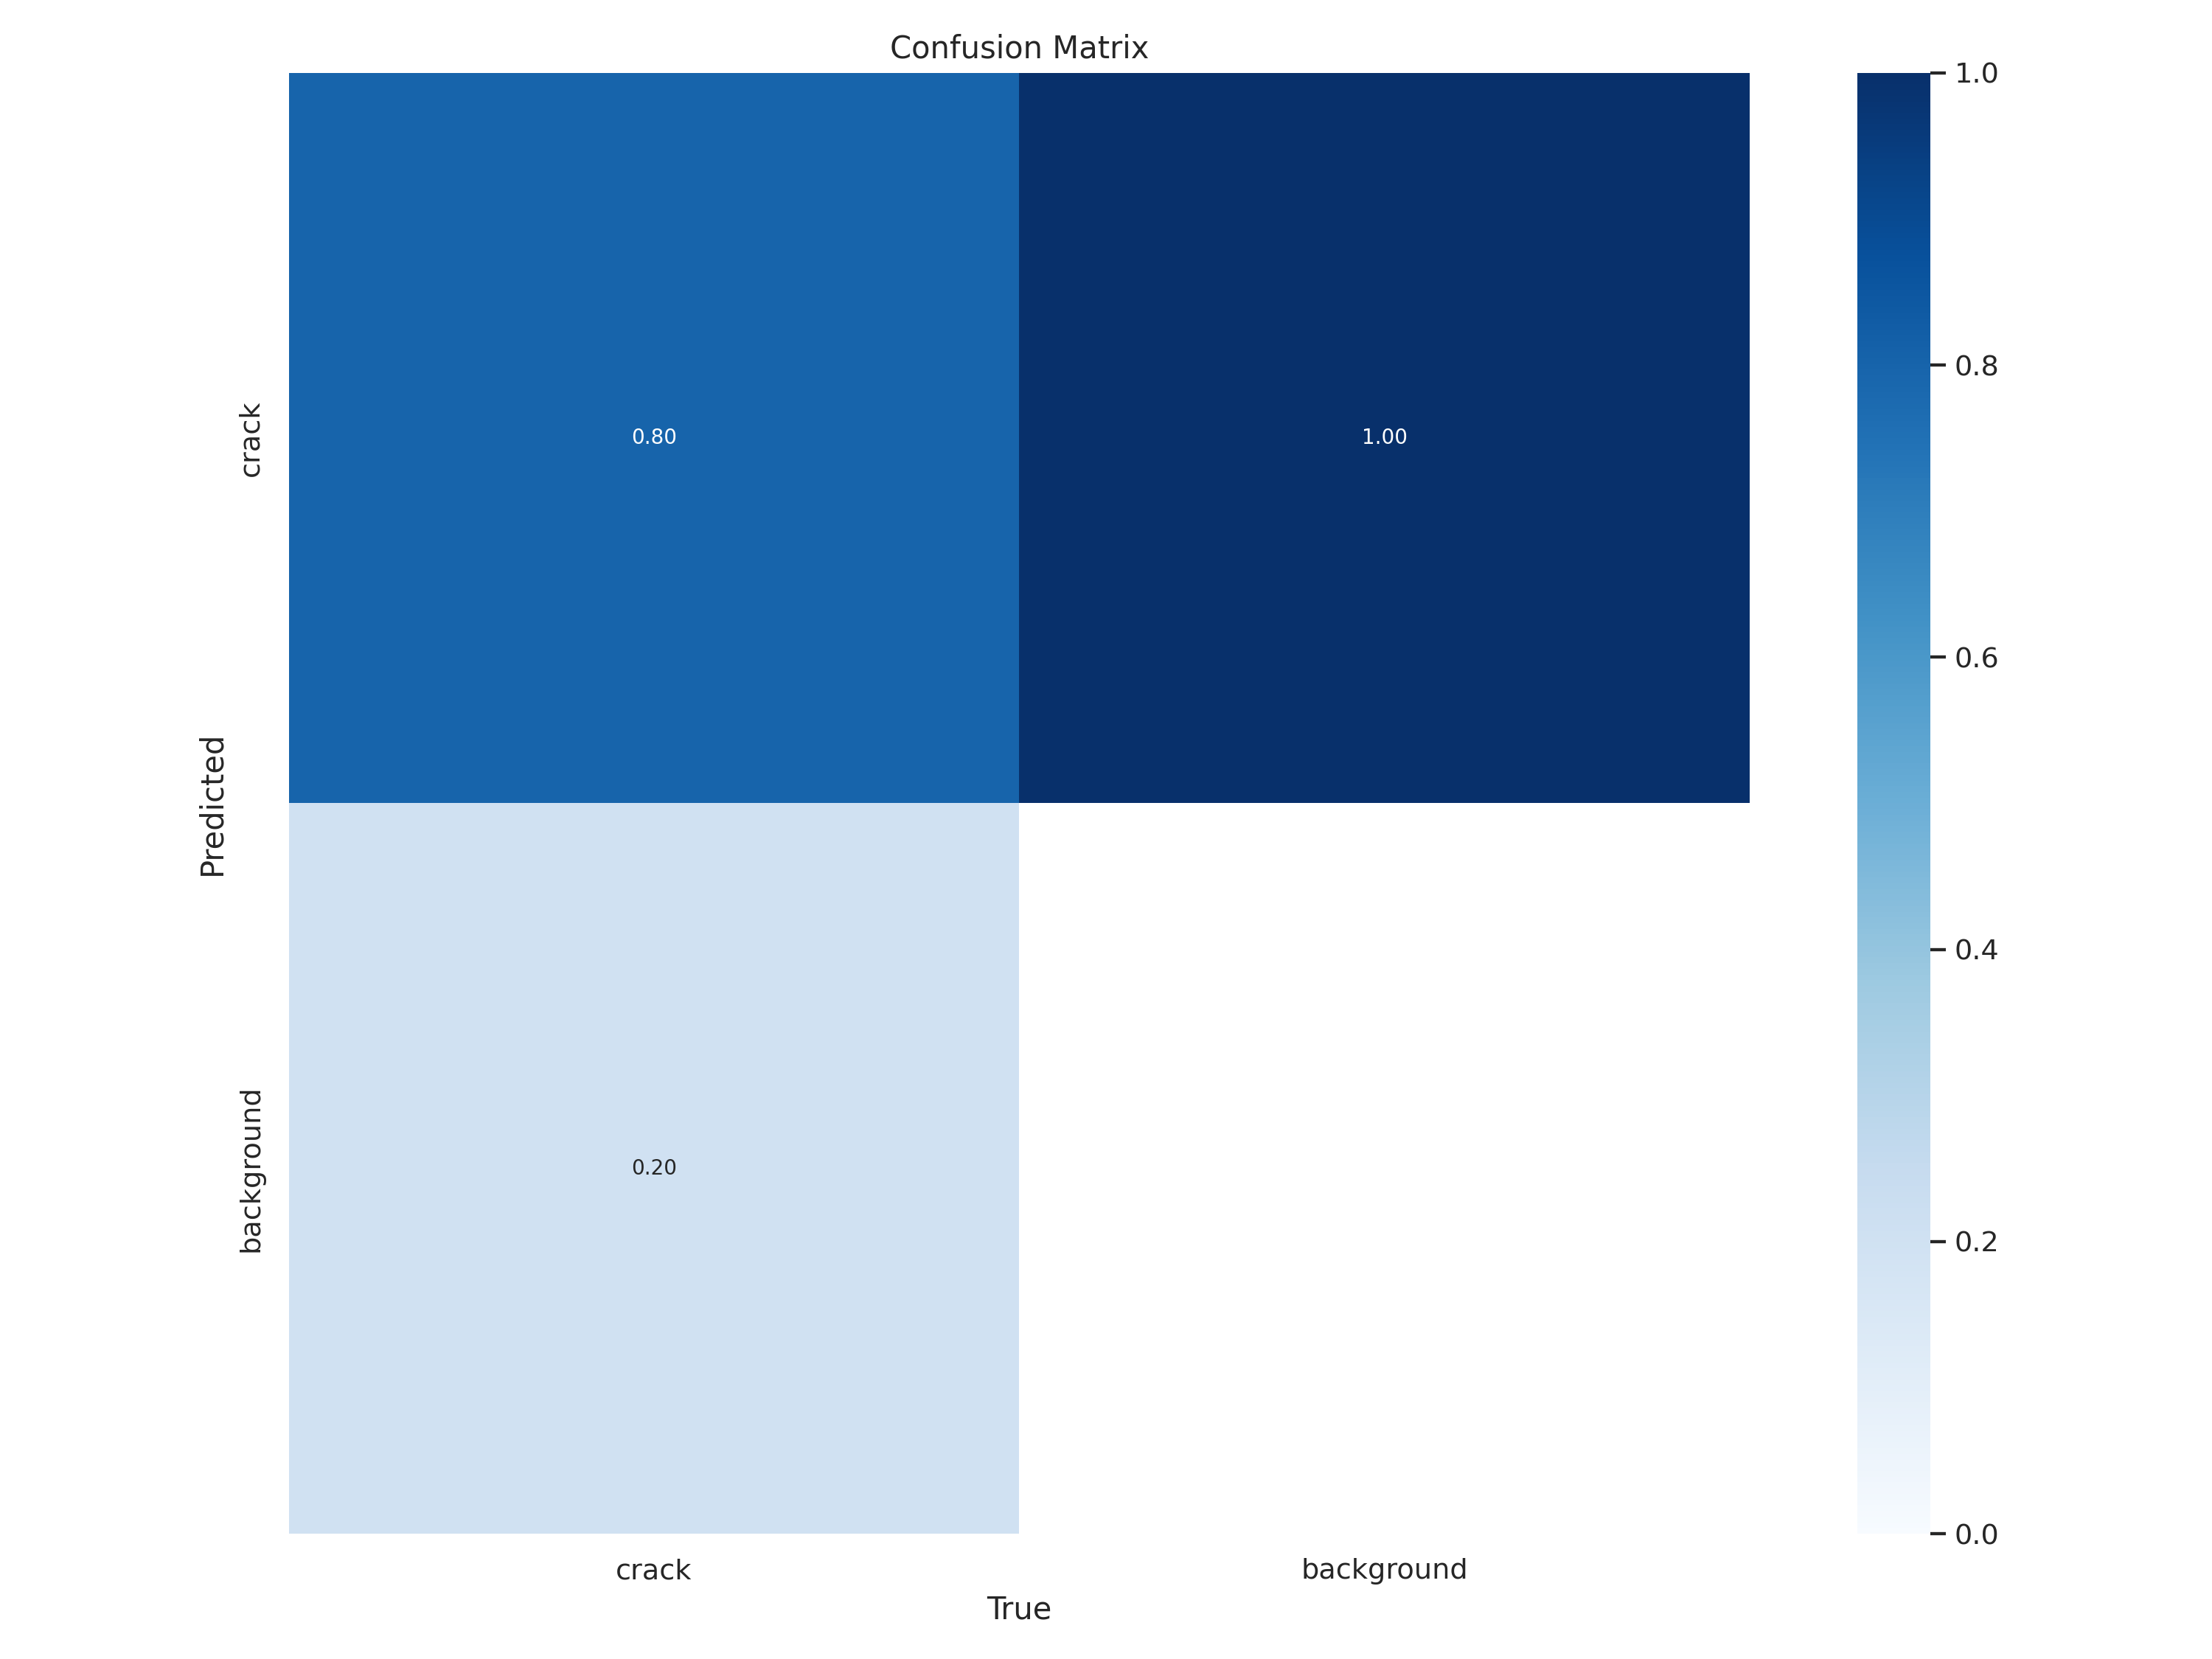

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


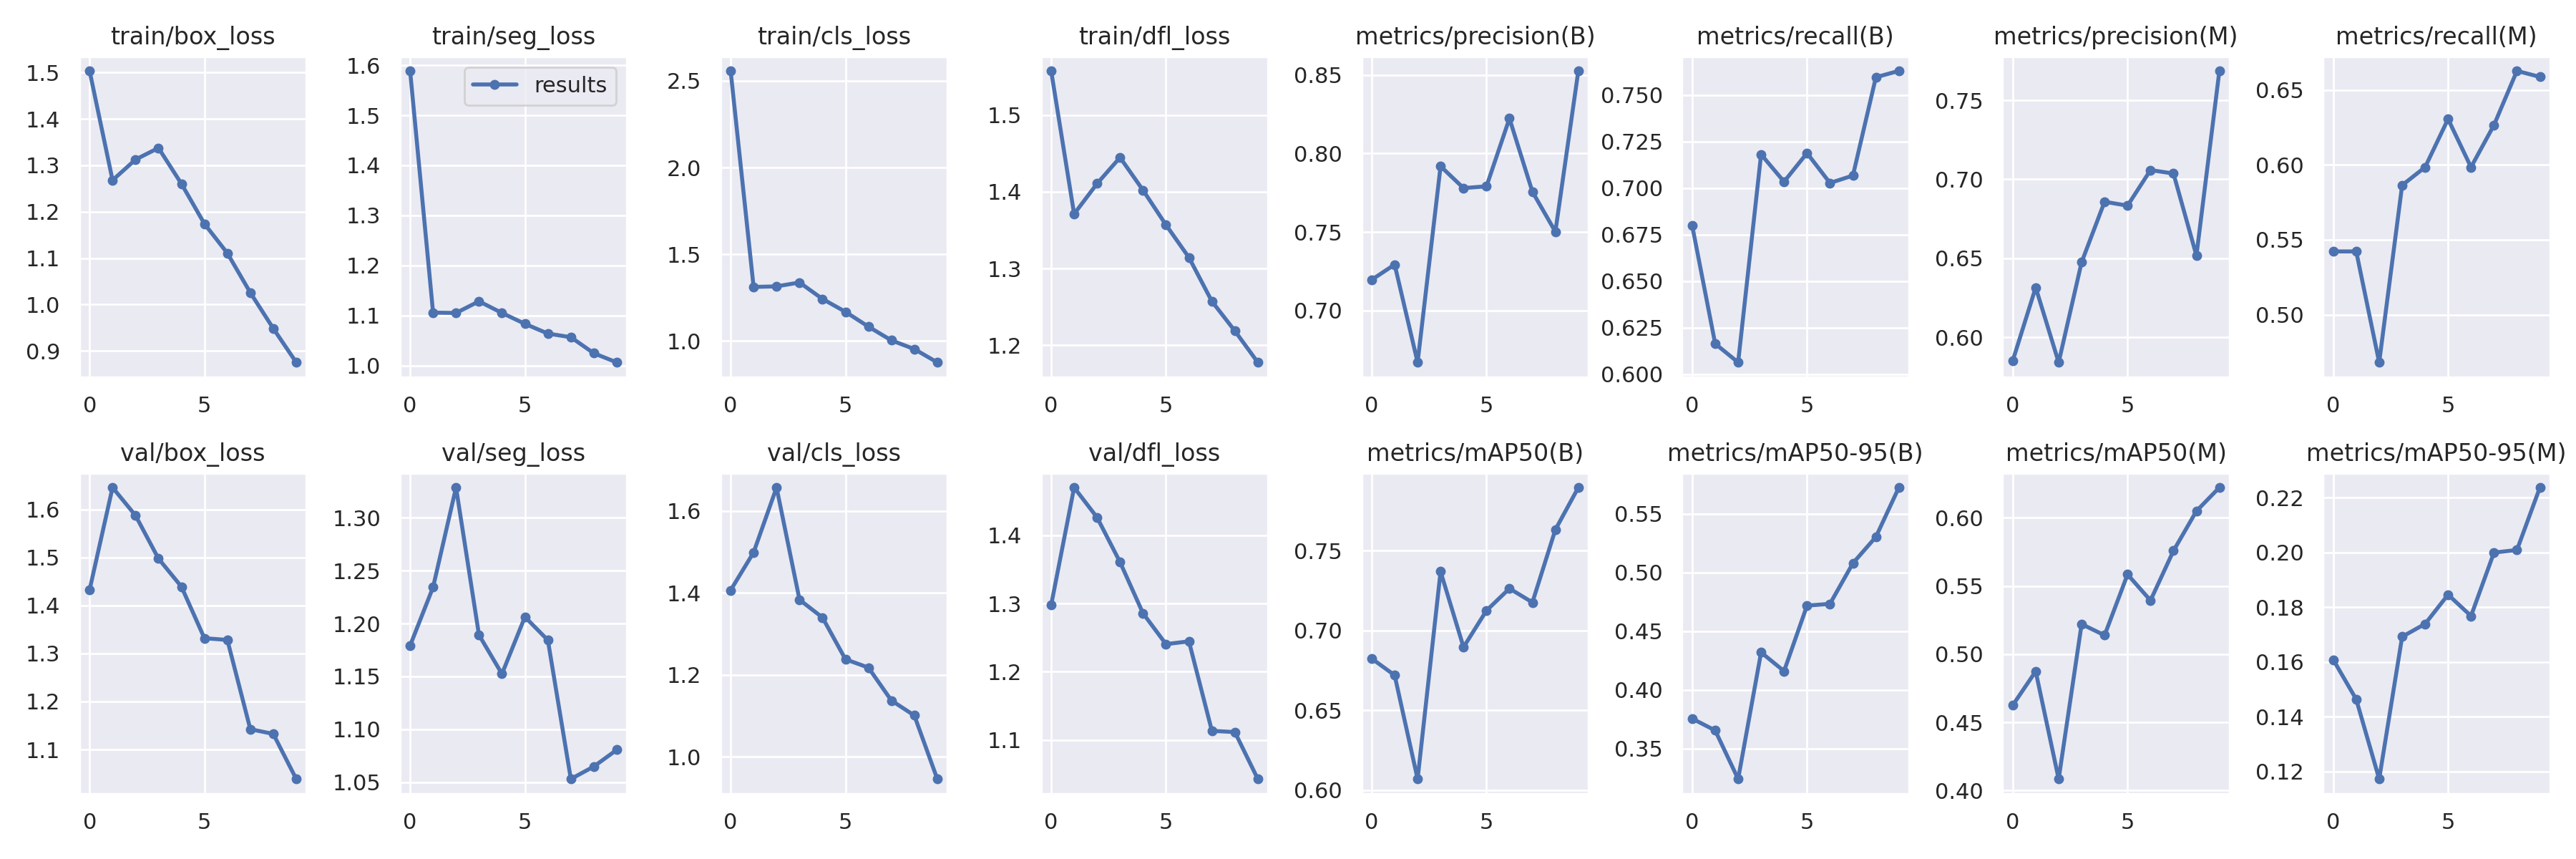

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


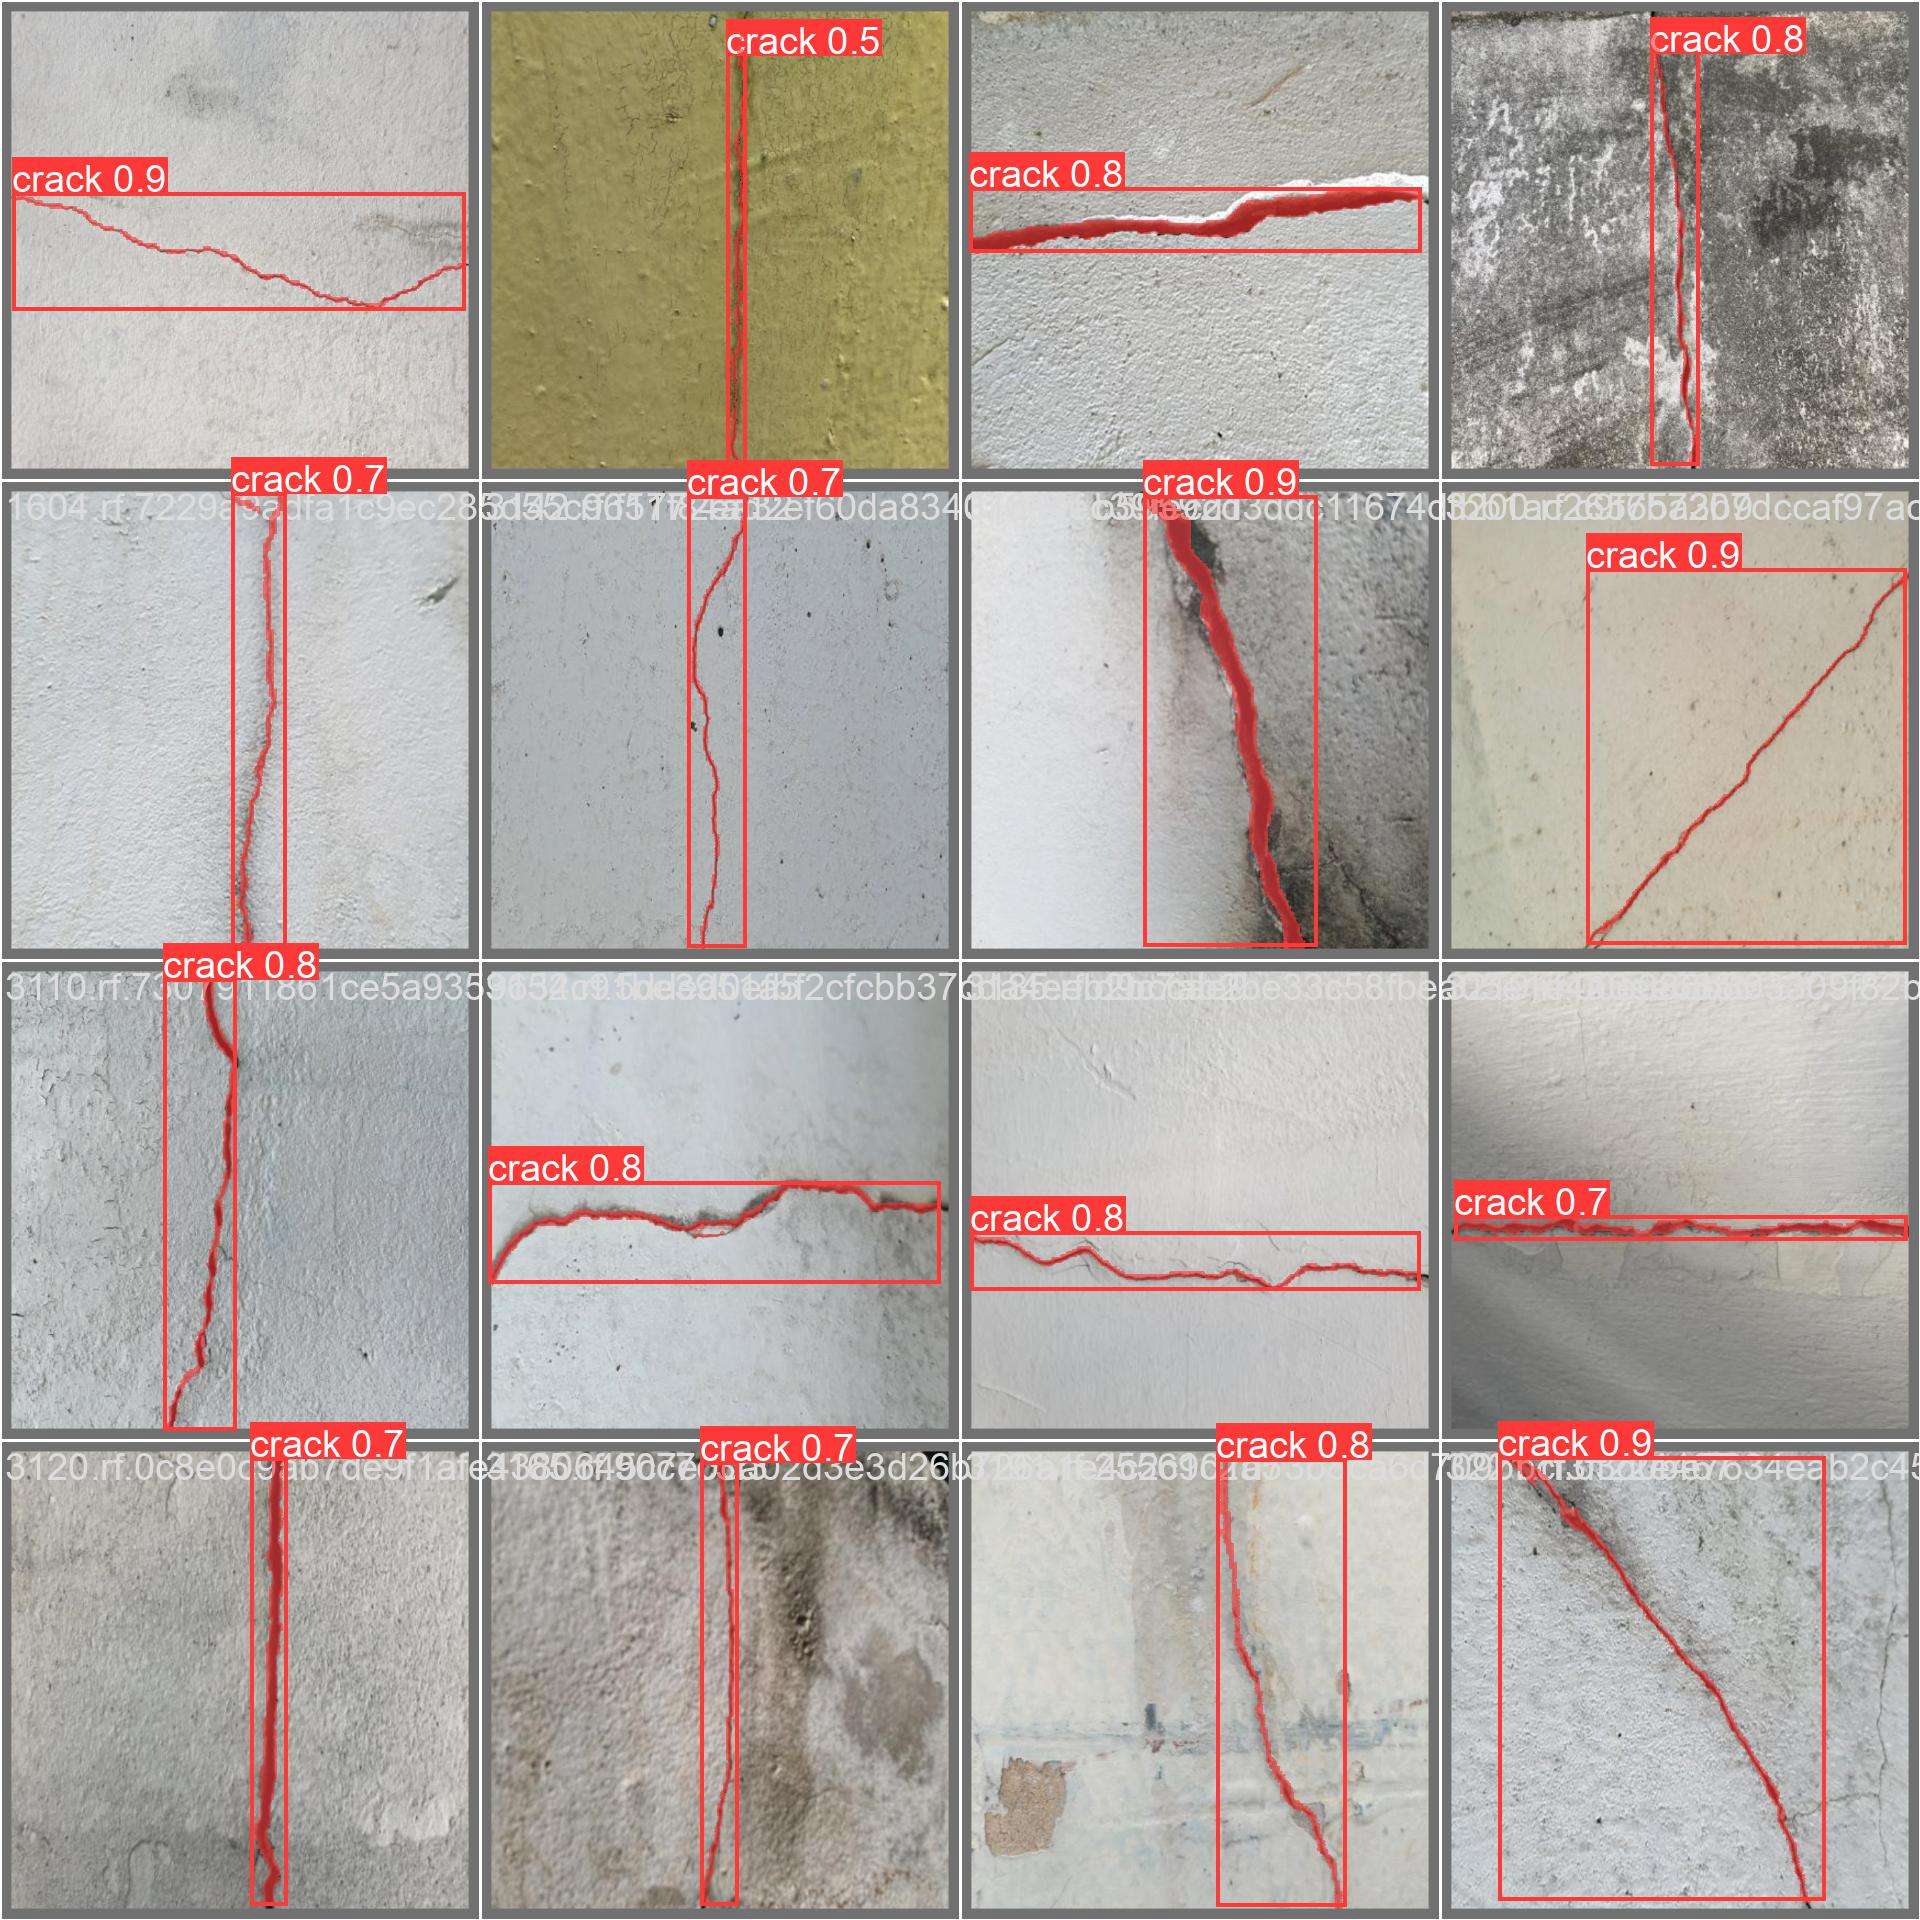

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)


In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-25 16:41:53.089251: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 16:41:54.024460: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/crack-2/valid/labels.cache... 200 images, 1 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 13/13 [00:08<00:00,  1.50it/s]
                   all        200        249      0.853      0.763       0.79    

/content


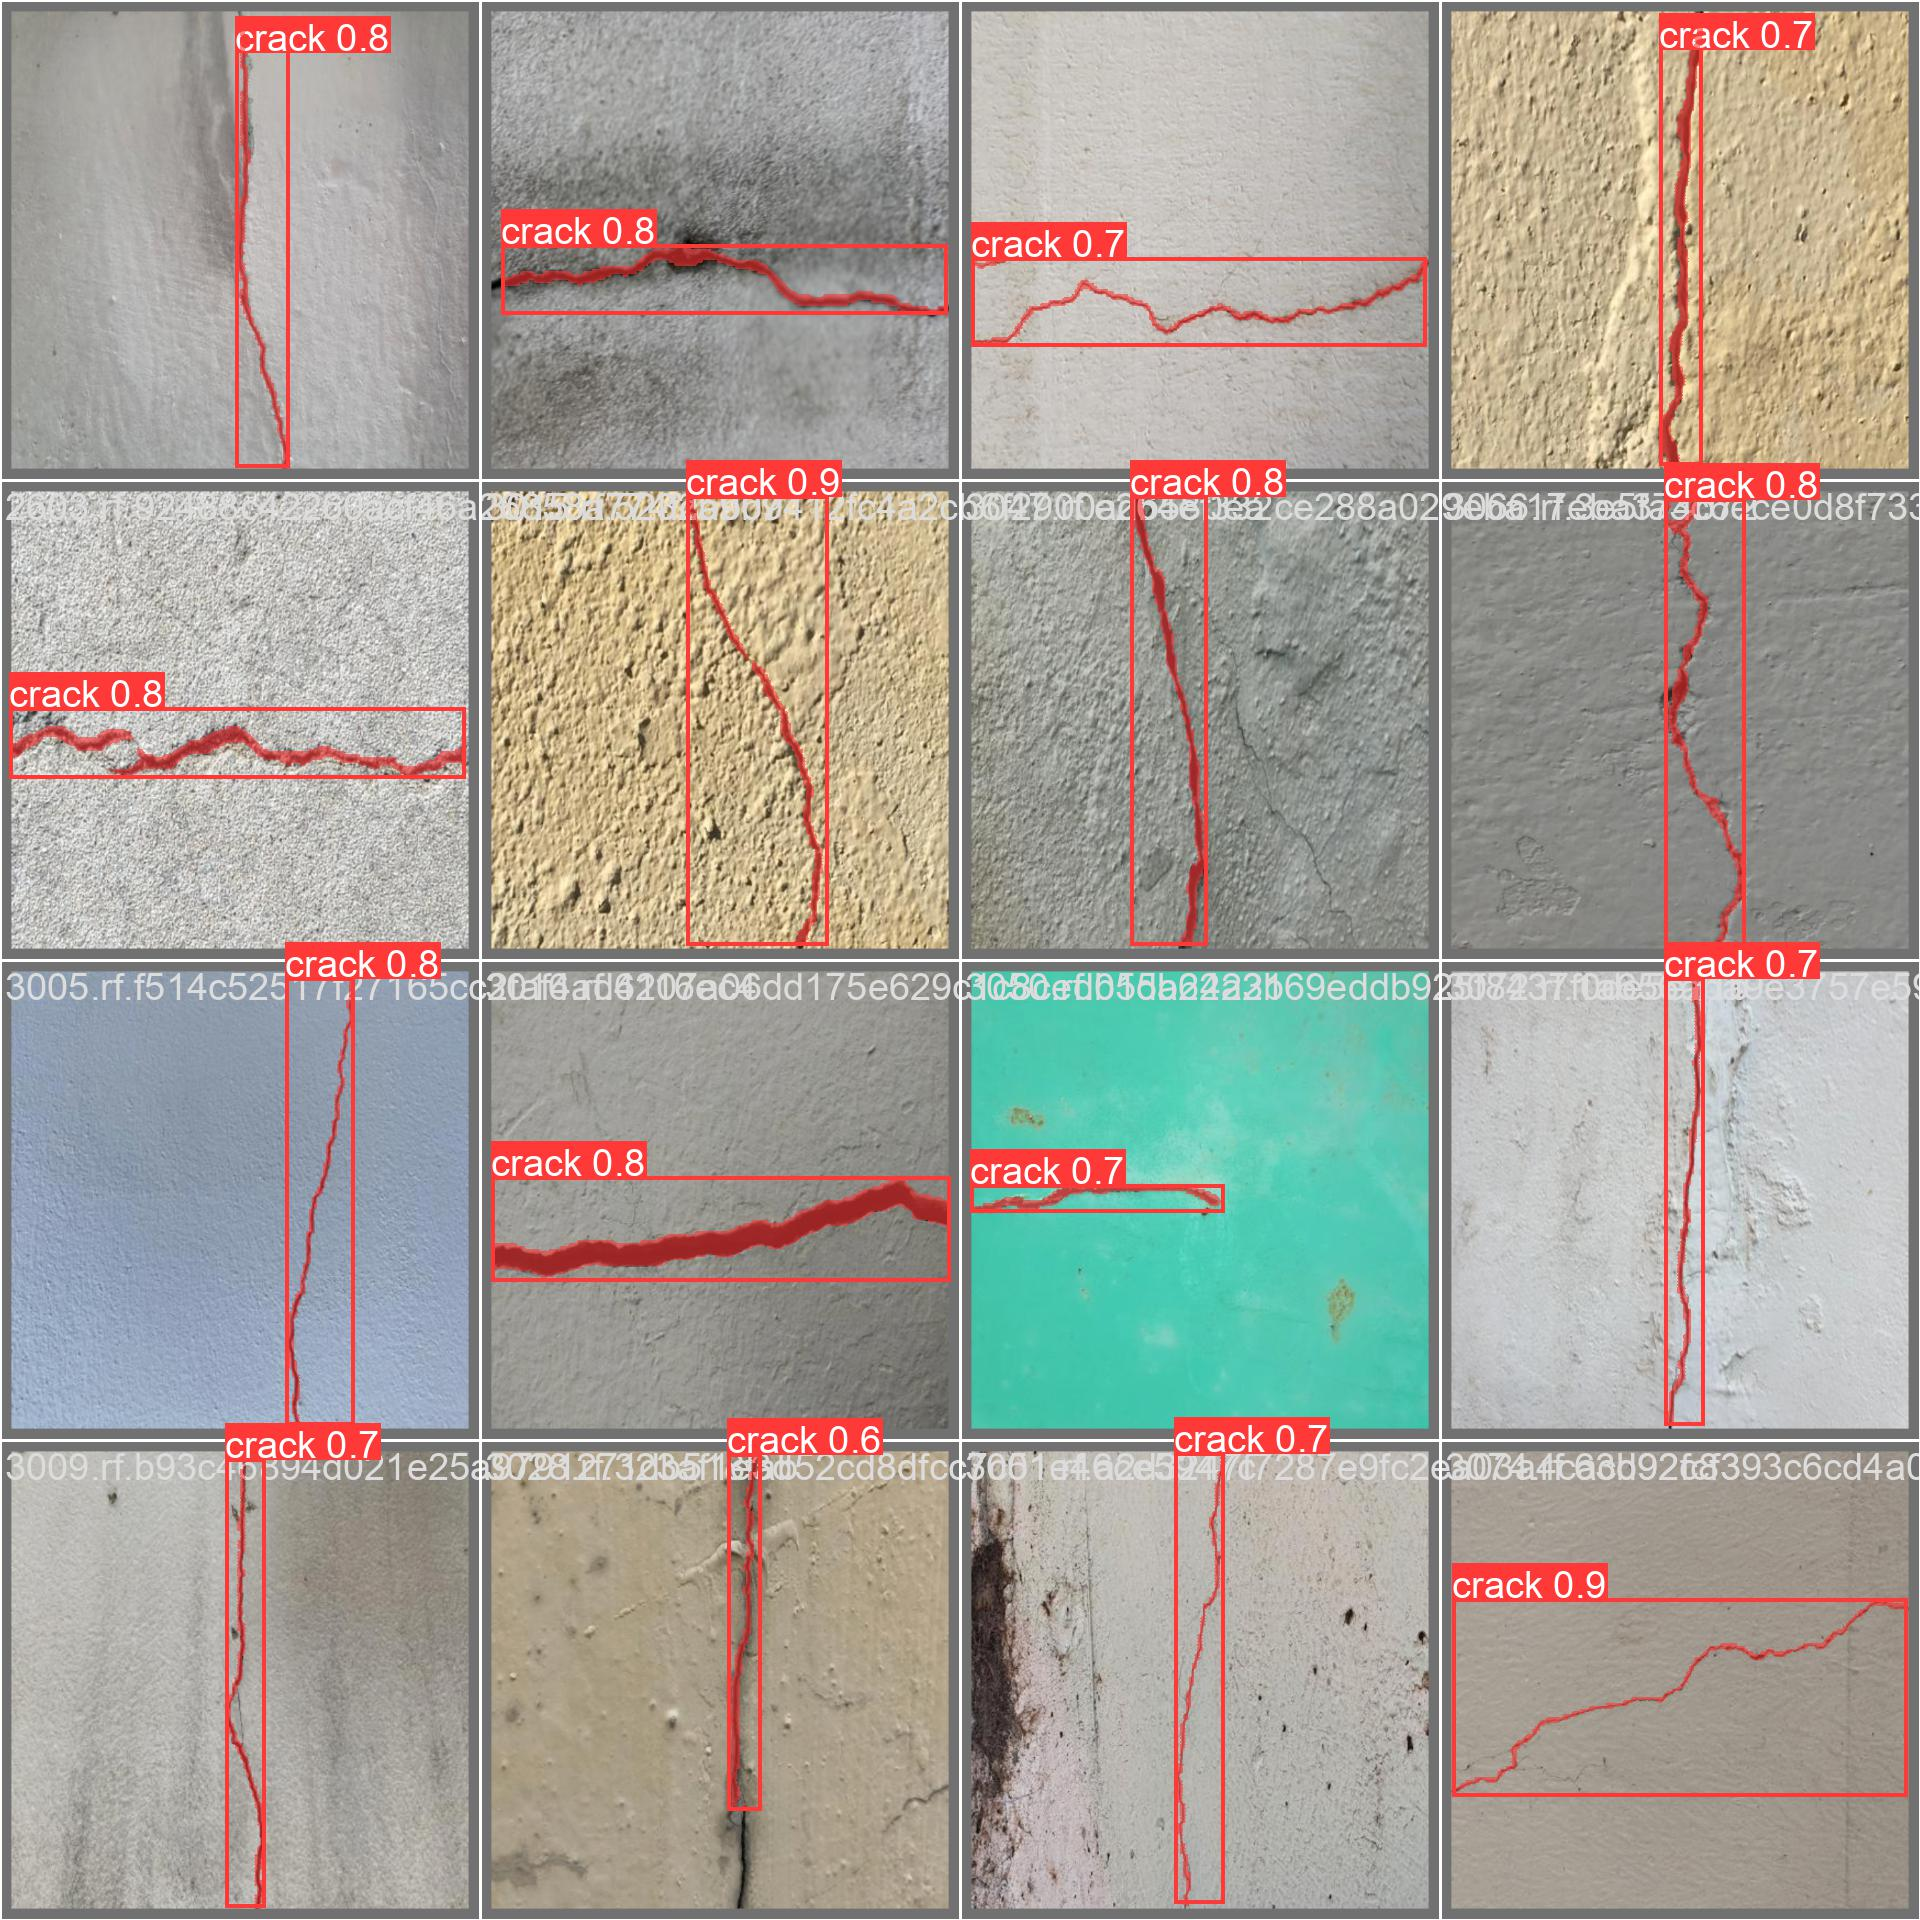

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch1_pred.jpg', width=600)

In [ ]:
!pip install google.colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = ["/content/drive/MyDrive/WhatsApp Image 2023-05-25 at 13.49.30.jpeg"]
YOLO('yolov8s-seg.pt').predict(img, save = True, show = True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

0: 640x480 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([0, 6])
 dtype: torch.float32
  + tensor([], device='cuda:0', size=(0, 6))]

In [ ]:
import cv2

In [ ]:
result = YOLO('yolov8s-seg.pt').predict(img, save = True, show = True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

0: 640x480 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict6


In [ ]:
print(result)

[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([0, 6])
dtype: torch.float32
 + tensor([], device='cuda:0', size=(0, 6))]
